## Outlier Removal Using IQR

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\moham\AppData\Local\Temp\ipykernel_24288\2660915427.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv("./scholarship(1).csv")
data.shape

(1000, 3)

In [3]:
data.head()

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0


C:\Users\moham\AppData\Local\Temp\ipykernel_24288\1516048071.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['scholarship_exam_marks'])


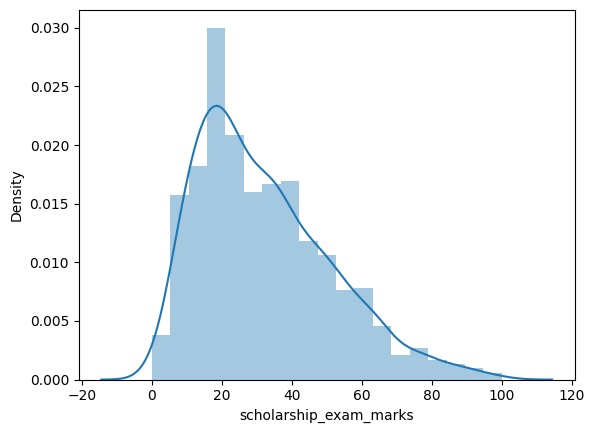

In [4]:
# plt.subplot(1,2,2)
sns.distplot(data['scholarship_exam_marks'])
plt.show()

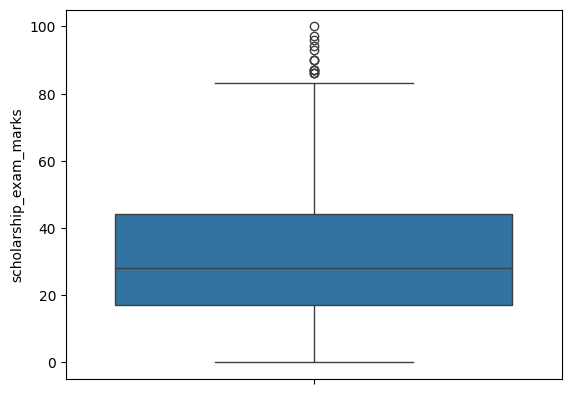

In [5]:
sns.boxplot(data['scholarship_exam_marks'])
plt.show()

In [6]:
Q1 = data['scholarship_exam_marks'].quantile(0.25)
Q3 = data['scholarship_exam_marks'].quantile(0.75)

In [7]:
IQR = Q3 - Q1
IQR

27.0

In [8]:
min = Q1 - 1.5*IQR
max = Q3 + 1.5*IQR

In [9]:
(min,max)

(-23.5, 84.5)

## Trimming

In [10]:
data[(data['scholarship_exam_marks'] < min) | (data['scholarship_exam_marks']>max)]

,semester_percentage,scholarship_exam_marks,got_scholarship
9,77.5,94,1
40,66.0,86,1
61,75.1,86,0
134,63.3,93,0
162,78.0,90,0
283,70.9,87,0
290,83.8,87,0
311,69.7,87,1
324,66.4,90,0
630,65.6,96,1


## Capping

In [11]:
data['scholarship_exam_marks'] = np.where(data['scholarship_exam_marks']<min,min, np.where(data['scholarship_exam_marks']>max, max, data['scholarship_exam_marks']))

In [12]:
data[(data['scholarship_exam_marks'] < min) | (data['scholarship_exam_marks']>max)]

,semester_percentage,scholarship_exam_marks,got_scholarship


In [13]:
data.shape

(1000, 3)

<Axes: ylabel='scholarship_exam_marks'>

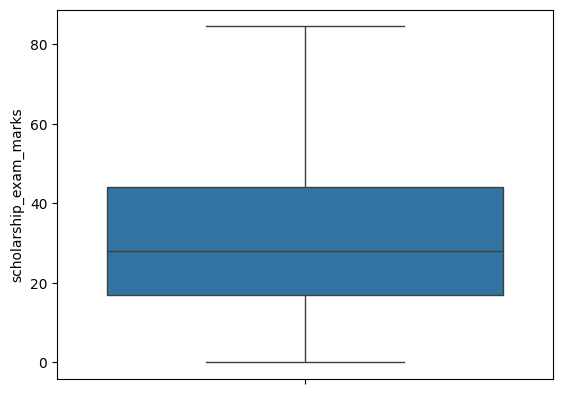

In [14]:
sns.boxplot(data['scholarship_exam_marks'])